# Classical analysis on radar data

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from loader import get_experiment_names, load_experiment
from declutter import declutter

In [2]:
base_folder_path, names = get_experiment_names('SR250Mate', 'recovery')

for name in names:
    print(f"'{name}'")

'Millenial_M_recovery_20250526-180201_sr250_rx2.npy'
'Millenial_M_recovery_20250526-180201_sr250_rx1.npy'
'Millenial_M_recovery_20250526-180201_sr250_rx0.npy'


## Declutter experiment

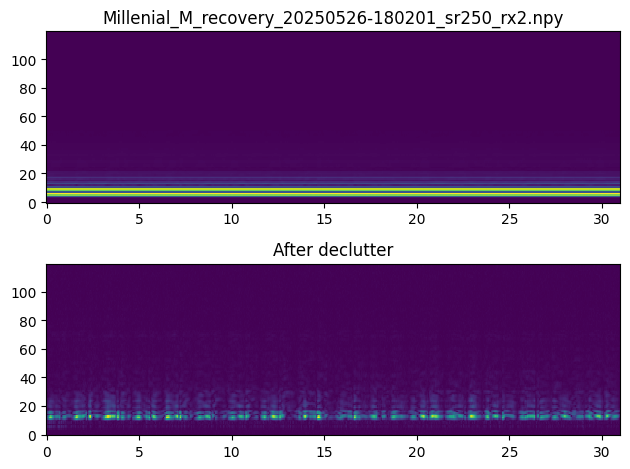

In [3]:
name = names[0]

raw = load_experiment(base_folder_path, name)
decluttered = declutter(raw)

bins = np.arange(raw.shape[1])
seconds = np.arange(raw.shape[0]) / 20
XX, YY = np.meshgrid(seconds, bins)

fig, ax = plt.subplots(2,1)
ax[0].pcolormesh(XX, YY, np.abs(raw).T)
ax[0].set_title(name)
ax[1].pcolormesh(XX, YY, np.abs(decluttered).T)
ax[1].set_title('After declutter')

plt.tight_layout()
plt.show()

## Bin removal
Many bins are absolutely static and show no information. We use the covariance matrix as a tool to investigate dependencies between bins

In [4]:
base_folder_path, names = get_experiment_names('SR250Mate', 'intensity')

for name in names:
    print(f"'{name}'")

'MillenIAls_E_100w_low_20250526-160932_sr250_rx0.npy'
'MillenIAls_M_150w_medium_70rpm_20250526-161349_sr250_rx2.npy'
'MillenIAls_E_100w_low_90rpm_20250526-161135_sr250_rx0.npy'
'MillenIAls_M_100w_low_75rpm_20250526-161802_sr250_rx0.npy'
'MillenIAls_M_150w_medium_80rpm20250526-162203_sr250_rx1.npy'
'MillenIAls_M_300w_high_20250526-180117_sr250_rx2.npy'
'MillenIAls_E_100w_low_90rpm_20250526-161135_sr250_rx1.npy'
'MillenIAls_M_200w_high_75rpm_20250526-161541_sr250_rx2.npy'
'MillenIAls_E_100w_low_20250526-160932_sr250_rx1.npy'
'MillenIAls_M_200w_high_80rpm_20250526-162325_sr250_rx0.npy'
'MillenIAls_M_100w_low_100rpm_20250526-161943_sr250_rx2.npy'
'MillenIAls_M_300w_high_20250526-180117_sr250_rx1.npy'
'MillenIAls_M_100w_low_100rpm_20250526-161943_sr250_rx0.npy'
'MillenIAls_M_100w_low_100rpm_20250526-161943_sr250_rx1.npy'
'MillenIAls_M_100w_low_75rpm_20250526-161802_sr250_rx2.npy'
'MillenIAls_M_150w_medium_80rpm20250526-162203_sr250_rx0.npy'
'MillenIAls_E_100w_low_20250526-160932_sr250_rx2.n

In [5]:
name = 'MillenIAls_M_200w_high_75rpm_20250526-161541_sr250_rx2.npy'
raw = load_experiment(base_folder_path, name)
mag = np.abs(raw)

# matrice di covarianza, forse dovremmo solo visualizzare la matrice di correlazione?
S = np.cov(mag.T)
corr = np.corrcoef(mag.T)

print(f'mag.shape  {mag.shape}')
print(f'S.shape    {S.shape}')
print(f'corr.shape {corr.shape}')

mag.shape  (1220, 120)
S.shape    (120, 120)
corr.shape (120, 120)


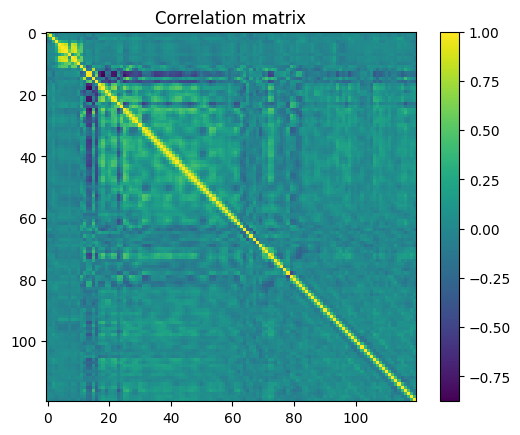

In [6]:
plt.title("Correlation matrix")
plt.imshow(corr)
plt.colorbar()
plt.show()

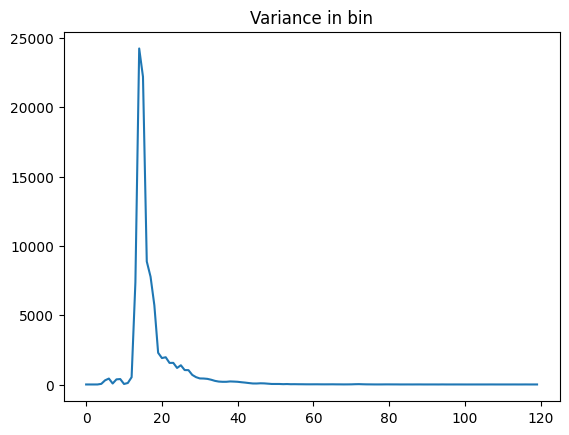

In [7]:
plt.title("Variance in bin")
plt.plot(np.diag(S))
plt.show()

We also present the same variance result after the decluttering step

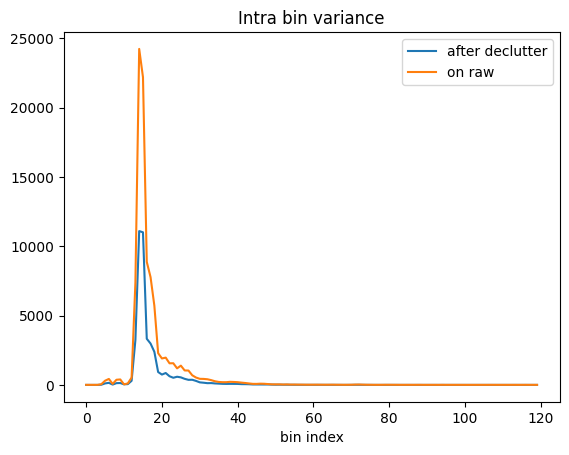

In [8]:
decluttered = declutter(raw)
mag = np.abs(decluttered)

# matrice di covarianza, forse dovremmo solo visualizzare la matrice di correlazione?
var = np.var(mag, axis=0)

plt.title("Intra bin variance")
plt.plot(var, label='after declutter')
plt.plot(np.diag(S), label='on raw')
plt.xlabel('bin index')
plt.legend()
plt.show()

Ripropongo la stessa analisi con l'energia media nei bin. Mi aspetto di vedere lo stesso comportamento qualitativo.

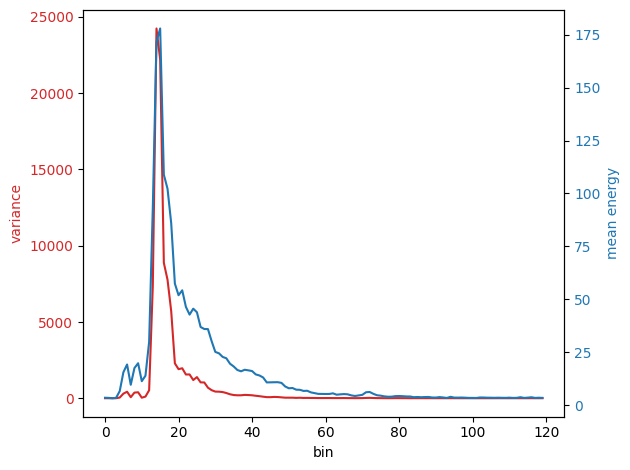

In [9]:
mean_energy = np.mean(mag, axis=0)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('bin')
ax1.set_ylabel('variance', color=color)
ax1.plot(np.diag(S), label='bin variance', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('mean energy', color=color)
ax2.plot(mean_energy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## Analisi della distanza ottimale sensore
Sfruttiamo proprio questo plot di varianza

In [10]:
subject = 'M'
antenna = 'rx0'
base_folder_path, names = get_experiment_names('SR250Mate', 'signal-to-noise', subject, antenna)

for name in names:
    print(f"'{name}'")

'MillenIAls_M_signal-to-noise_00cm_20250526-150252_sr250_rx0.npy'
'MillenIAls_M_signal-to-noise_60cm_20250526-150705_sr250_rx0.npy'
'MillenIAls_M_signal-to-noise_40cm_20250526-150551_sr250_rx0.npy'
'MillenIAls_M_signal-to-noise_80cm_20250526-150826_sr250_rx0.npy'
'MillenIAls_M_signal-to-noise_20cm_20250526-150449_sr250_rx0.npy'


In [11]:
subset = {}
variances = {}

for name in names:
    atoms = name.split('_')
    distance = atoms[3]

    raw = load_experiment(base_folder_path, name)
    var = np.var(raw, axis=0)
    
    subset[distance] = name
    variances[distance] = var

for name in subset.values():
    print(name)

MillenIAls_M_signal-to-noise_00cm_20250526-150252_sr250_rx0.npy
MillenIAls_M_signal-to-noise_60cm_20250526-150705_sr250_rx0.npy
MillenIAls_M_signal-to-noise_40cm_20250526-150551_sr250_rx0.npy
MillenIAls_M_signal-to-noise_80cm_20250526-150826_sr250_rx0.npy
MillenIAls_M_signal-to-noise_20cm_20250526-150449_sr250_rx0.npy


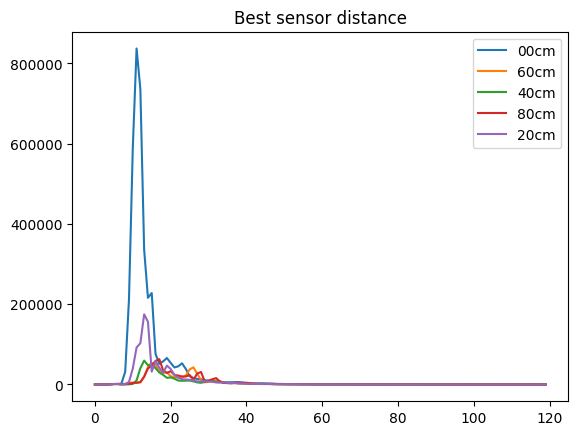

In [12]:
plt.title("Best sensor distance")

for label, var in variances.items():
    plt.plot(var, label=label)

plt.legend()
plt.show()

I picchi di varianza sono molto attenuati. Questo potrebbe essere compatibile con il fatto che la forza del segnale diminuisce con il quadrato della distanza. Intuisco che abbiamo comunque fatto bene a prendere le misure a 20cm perché così abbiamo conservato la maggior informazione

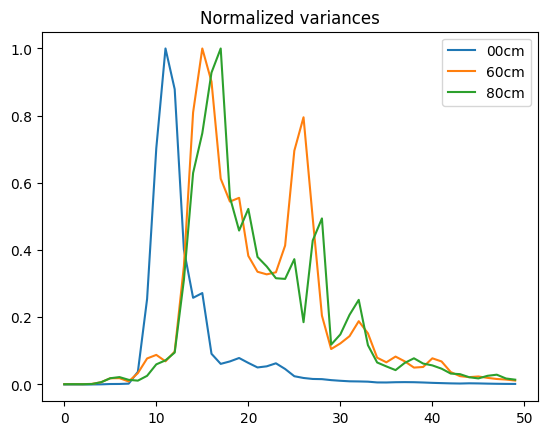

In [13]:
# plot delle varianze, rinormalizzando ai picchi
plt.title('Normalized variances')

for label in ['00cm', '60cm', '80cm']:
    var = variances[label]
    normalized = var / np.max(var)

    plt.plot(normalized[:50], label=label)

plt.legend()
plt.show()

Cose rimaste insolute:
  * fare una PCA per unire tutte le informazioni in un unico bin
  * fare l'analisi degli spettri partendo dalla PCA